In [1]:
# seaborn

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [43]:
insurance = pd.read_csv('insurance.csv')

In [44]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA : 

In [45]:
insurance.shape

(1338, 7)

In [46]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
categorical, numerical = [], []
for col in insurance.columns:
    if insurance[col].dtypes == object:
        categorical.append(col)
    else:numerical.append(col)

In [73]:
categorical

['sex', 'smoker', 'region']

In [74]:
numerical

['age', 'bmi', 'children', 'charges']

In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Insights : 

In [14]:
# checking for the missing values :
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
# Univariate analysis : 
# Categorical/Numerical 

In [16]:
categorical_data = insurance[categorical]

In [17]:
categorical_data

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [22]:
unique_gender = categorical_data['sex'].value_counts().reset_index()['sex']

In [23]:
gender_count = categorical_data['sex'].value_counts().reset_index()['count']

<BarContainer object of 2 artists>

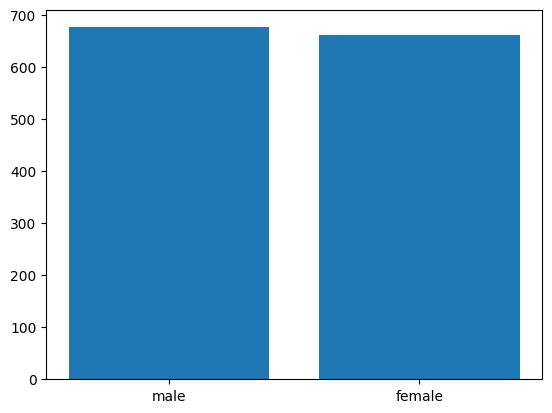

In [24]:
plt.bar(unique_gender, gender_count)

<Axes: xlabel='sex', ylabel='count'>

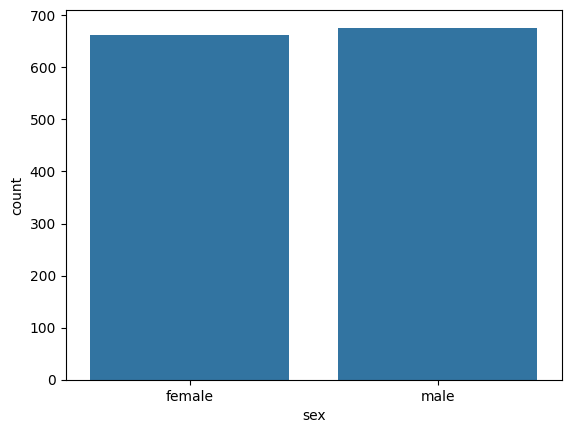

In [25]:
sns.countplot(data = insurance, x = 'sex')

# Seaborn graphs : 
1. Line plot
2. Scatter plot
3. bar plot
4. box plot
5. count plot
6. violin plot
7. heatmap
8. pair plot
9. reg plot
10. dist plot
11. hist plot
12. kde plot

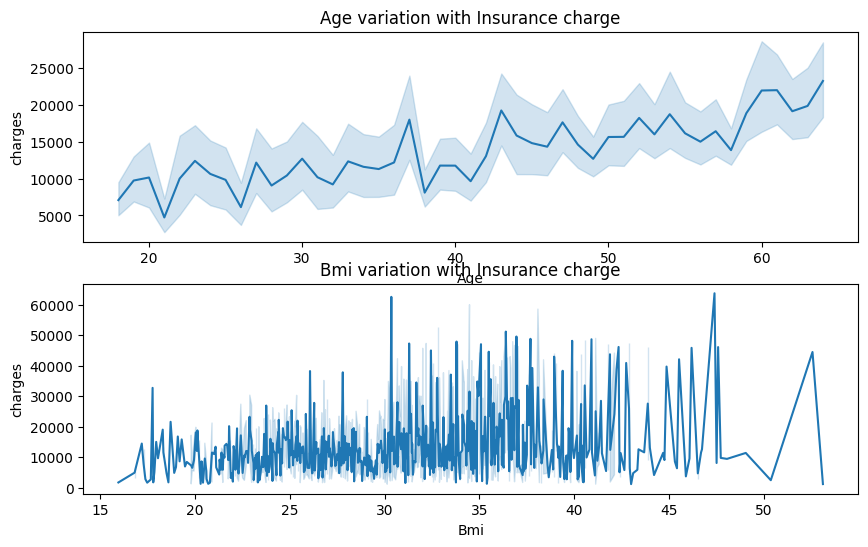

In [39]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.lineplot(x = 'age',y = 'charges', data = insurance)
plt.title("Age variation with Insurance charge")
plt.xlabel('Age')
plt.ylabel('charges')

plt.subplot(2, 1, 2)
sns.lineplot(x = 'bmi', y = 'charges', data = insurance)
plt.title('Bmi variation with Insurance charge')
plt.xlabel('Bmi')
plt.ylabel('charges')

plt.show()

# Insights : 

In [75]:
numerical

['age', 'bmi', 'children', 'charges']

In [76]:
cols = numerical
def numerical_feature_variation(insurance):
    plt.figure(figsize=(10, 6))
    i = 1
    cols.remove('charges')
    for col in cols:
        plt.subplot(3, 1, i)
        i = i + 1
        sns.scatterplot(x = col , y = 'charges', data = insurance)
        plt.title(f'{col} variation with Insurance charge')
        plt.xlabel(f'{col}')
        plt.ylabel('charges')
        plt.tight_layout()
        plt.show()


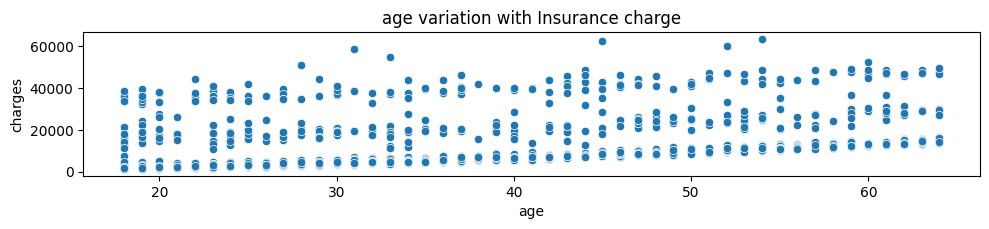

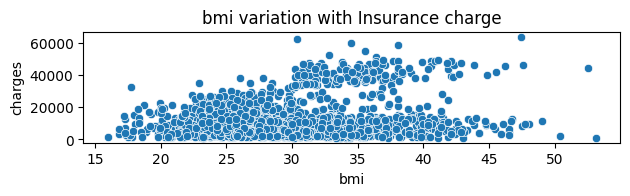

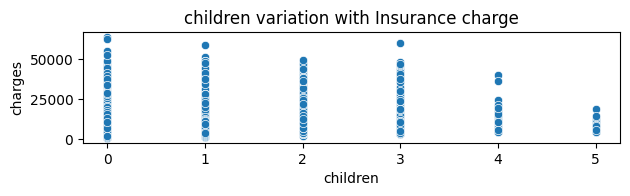

In [77]:
numerical_feature_variation(insurance)

<Axes: xlabel='age', ylabel='Count'>

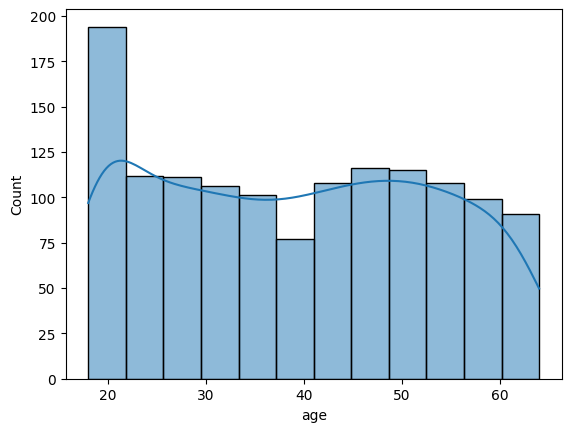

In [82]:
sns.histplot(insurance['age'], kde=True)

<Axes: xlabel='age', ylabel='Density'>

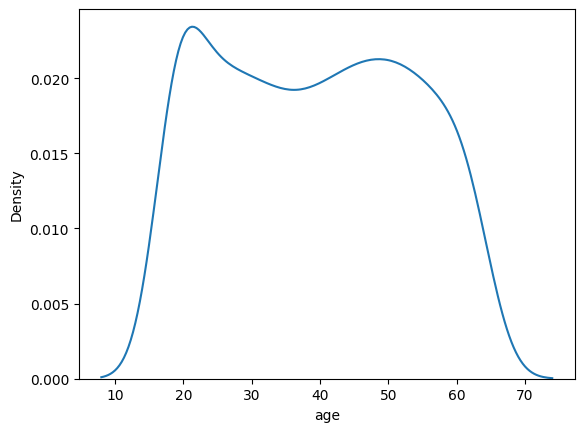

In [87]:
sns.distplot(insurance['age'], kde= True, hist = False)

<Axes: xlabel='bmi', ylabel='Density'>

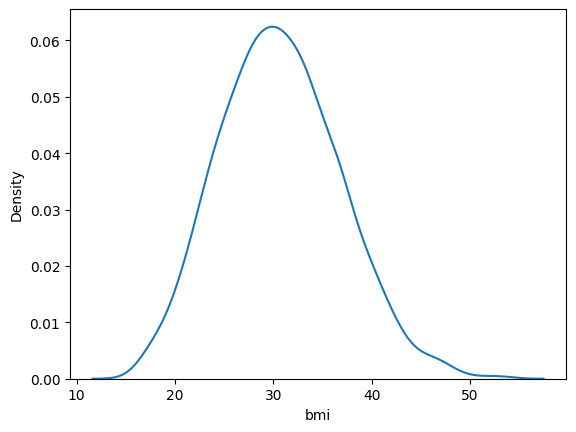

In [88]:
sns.distplot(insurance['bmi'], kde= True, hist = False)

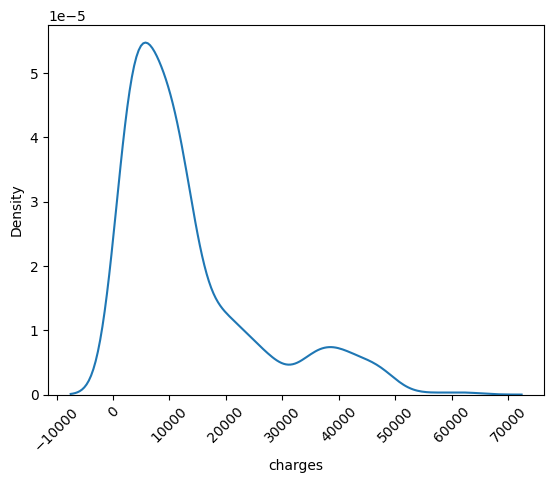

In [91]:
sns.distplot(insurance['charges'], kde= True, hist = False)
plt.xticks(rotation = 45)
plt.show()

In [95]:
def distribution_plot(insurance):
    for col in numerical:
        sns.distplot(insurance[col], kde= True, hist = False)
        plt.xticks(rotation = 45)
        plt.show()

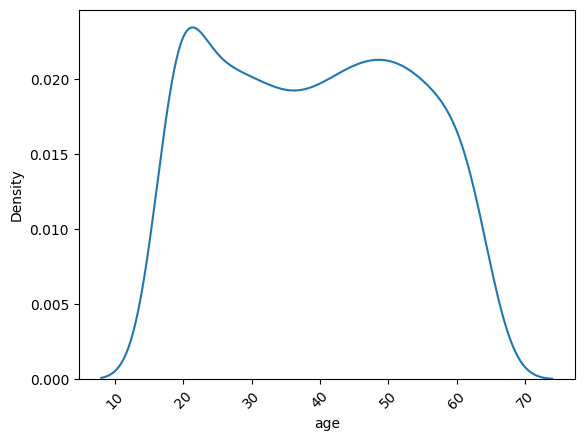

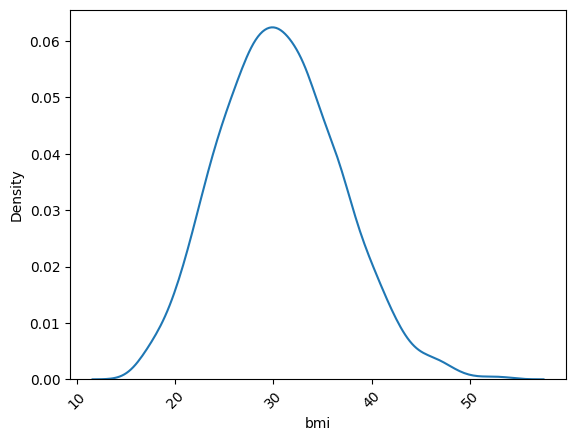

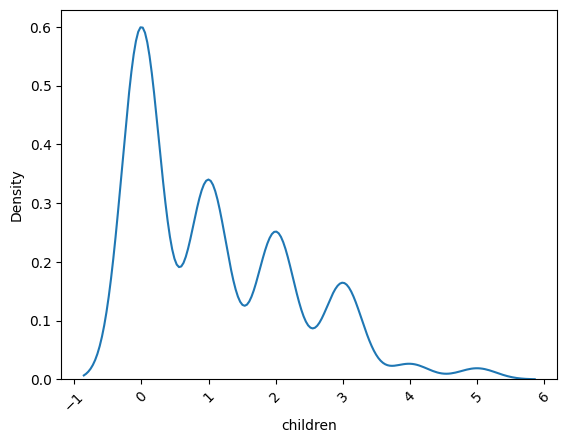

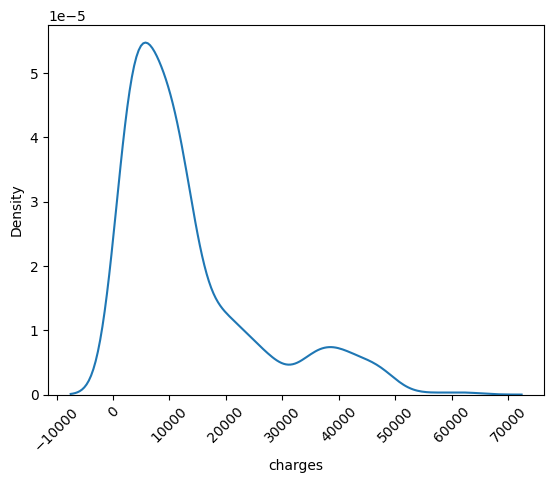

In [96]:
distribution_plot(insurance)

In [97]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
def categorical_feature_variation(insurance):
    for col in categorical:
        sns.countplot(x = col, data = insurance)
        plt.title(f"{col} Variations")
        plt.xlabel(f"{col}")
        plt.xticks(rotation = 90)
        plt.tight_layout()
        plt.show()

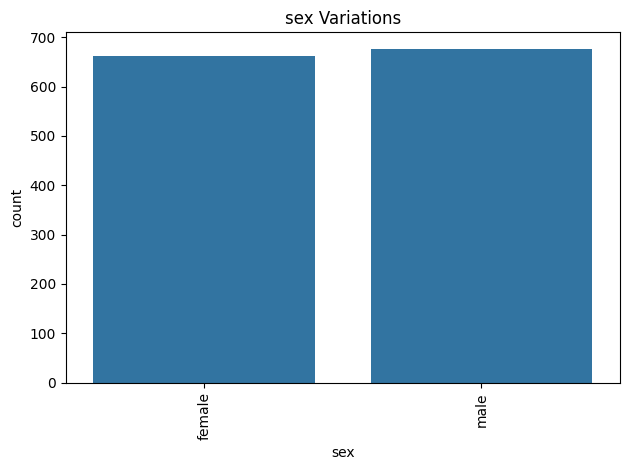

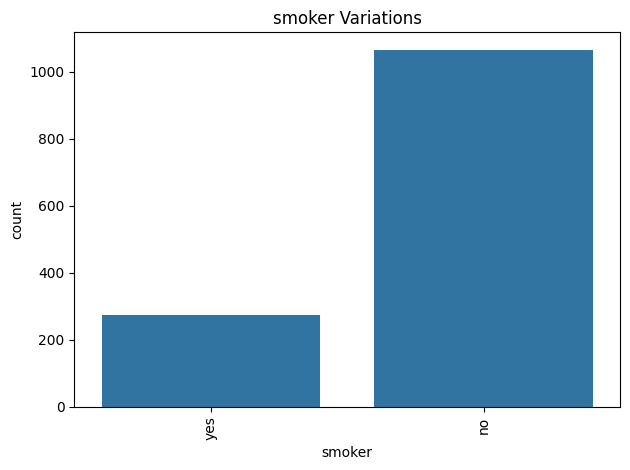

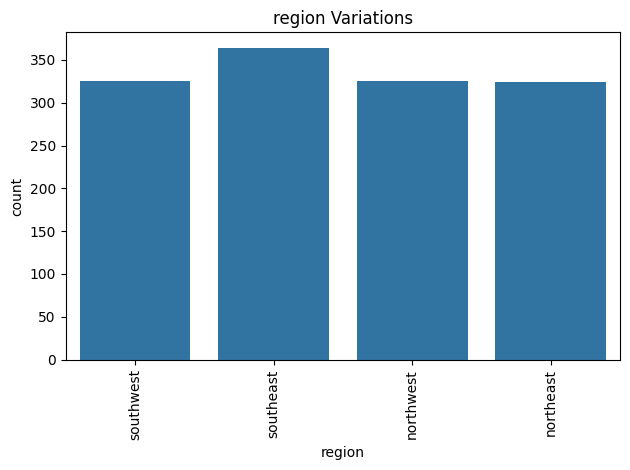

In [101]:
categorical_feature_variation(insurance)

In [110]:
insurance.groupby('sex')['charges'].mean().reset_index()


,sex,charges
0,female,12569.578844
1,male,13956.751178


In [131]:
def categorical_feature_charges(insurance):
    i = 1
    # plt.figure(figsize=(10, 6))
    for col in categorical:
        plt.figure(figsize=(8, 10))
        plt.subplot(len(categorical), 1, i)
        sns.barplot(x = insurance.groupby(col)['charges'].mean().reset_index()[col], y = insurance.groupby(col)['charges'].mean().reset_index()['charges'], data = insurance)
        plt.title(f"{col} VS charges ")
        plt.tight_layout()
        plt.xticks(rotation = 45)
        i += 1
        plt.show()

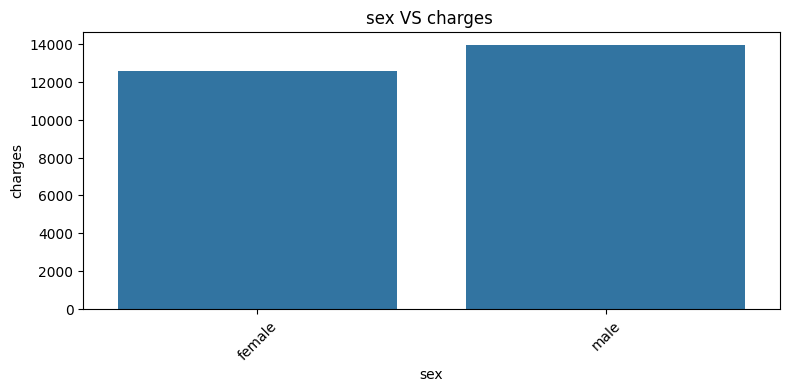

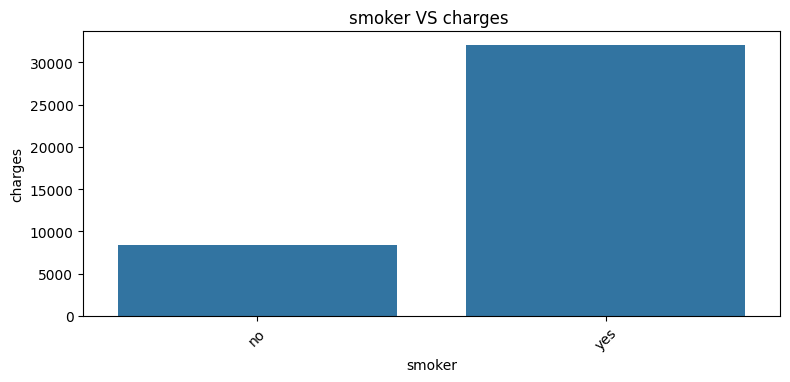

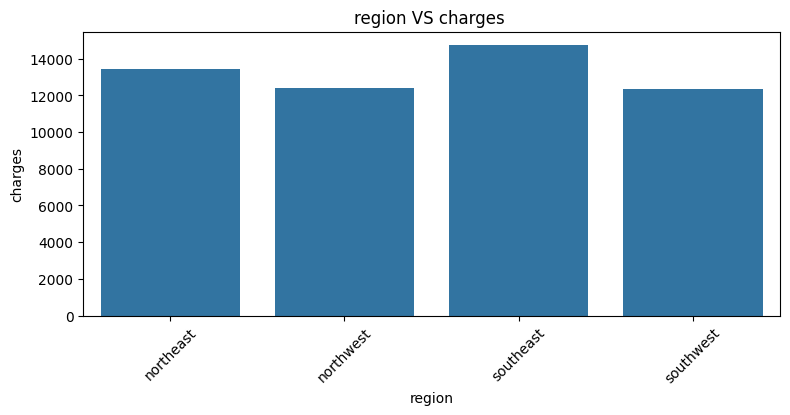

In [132]:
categorical_feature_charges(insurance)

<Axes: ylabel='bmi'>

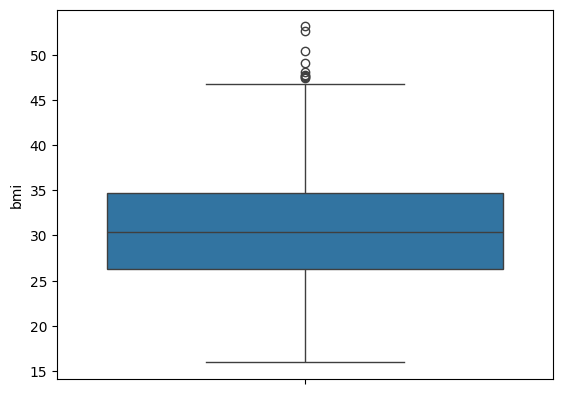

In [142]:
sns.boxplot(insurance['bmi'])

In [141]:
insurance['charges'].max()

63770.42801

In [136]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
